---

_You are currently looking at **version 1.2** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-machine-learning/resources/bANLa) course resource._

---

# Assignment 3 - Evaluation

In this assignment you will train several models and evaluate how effectively they predict instances of fraud using data based on [this dataset from Kaggle](https://www.kaggle.com/dalpozz/creditcardfraud).
 
Each row in `fraud_data.csv` corresponds to a credit card transaction. Features include confidential variables `V1` through `V28` as well as `Amount` which is the amount of the transaction. 
 
The target is stored in the `class` column, where a value of 1 corresponds to an instance of fraud and 0 corresponds to an instance of not fraud.

In [5]:
import numpy as np
import pandas as pd

### Question 1
Import the data from `fraud_data.csv`. What percentage of the observations in the dataset are instances of fraud?

*This function should return a float between 0 and 1.* 

In [6]:
def answer_one():
    
    fraud = pd.read_csv('fraud_data.csv')  
    
    return fraud.Class.mean()

answer_one()

0.016410823768035772

In [3]:
# Use X_train, X_test, y_train, y_test for all of the following questions
from sklearn.model_selection import train_test_split

df = pd.read_csv('fraud_data.csv')

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

### Question 2

Using `X_train`, `X_test`, `y_train`, and `y_test` (as defined above), train a dummy classifier that classifies everything as the majority class of the training data. What is the accuracy of this classifier? What is the recall?

*This function should a return a tuple with two floats, i.e. `(accuracy score, recall score)`.*

In [14]:
def answer_two():
    from sklearn.dummy import DummyClassifier
    from sklearn.metrics import recall_score
    
    maj_dum = DummyClassifier(strategy = 'most_frequent').fit(X_train, y_train)
    y_pred = maj_dum.predict(X_test)
    rcs = recall_score(y_test, y_pred)
    
    return maj_dum.score(X_test, y_test), rcs

answer_two()

(0.98525073746312686, 0.0)

### Question 3

Using X_train, X_test, y_train, y_test (as defined above), train a SVC classifer using the default parameters. What is the accuracy, recall, and precision of this classifier?

*This function should a return a tuple with three floats, i.e. `(accuracy score, recall score, precision score)`.*

In [18]:
def answer_three():
    from sklearn.metrics import recall_score, precision_score
    from sklearn.svm import SVC

    clf = SVC().fit(X_train, y_train)
    
    acc = clf.score(X_train, y_train)
    
    y_pred = clf.predict(X_test)
    rcs = recall_score(y_test, y_pred)
    pcs = precision_score(y_test, y_pred)
    
    
    
    return acc, rcs, pcs

answer_three()

(0.99784866924826354, 0.375, 1.0)

### Question 4

Using the SVC classifier with parameters `{'C': 1e9, 'gamma': 1e-07}`, what is the confusion matrix when using a threshold of -220 on the decision function. Use X_test and y_test.

*This function should return a confusion matrix, a 2x2 numpy array with 4 integers.*

In [35]:
def answer_four():
    from sklearn.metrics import confusion_matrix
    from sklearn.svm import SVC

    y_score = SVC(C=1e9, gamma=1e-07).fit(X_train, y_train).decision_function(X_test)
    y_pred = []
    for i in y_score:
        a = int(np.where(i < -220, 0, 1))
        y_pred.append(a)
        
    confusion = confusion_matrix(y_test, y_pred)
    
    return confusion

answer_four()

array([[5320,   24],
       [  14,   66]])

### Question 5

Train a logisitic regression classifier with default parameters using X_train and y_train.

For the logisitic regression classifier, create a precision recall curve and a roc curve using y_test and the probability estimates for X_test (probability it is fraud).

Looking at the precision recall curve, what is the recall when the precision is `0.75`?

Looking at the roc curve, what is the true positive rate when the false positive rate is `0.16`?

*This function should return a tuple with two floats, i.e. `(recall, true positive rate)`.*

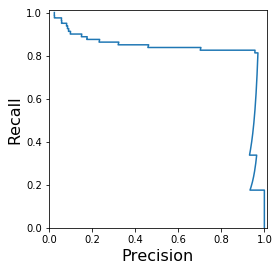

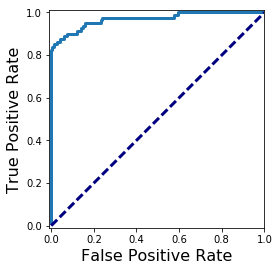

(0.85, 0.9)

In [8]:
def answer_five():
    #import matplotlib.pyplot as plt    
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import precision_recall_curve
    from sklearn.metrics import roc_curve, auc
    
    clf_scores = LogisticRegression().fit(X_train, y_train).decision_function(X_test)
    
    precision, recall, thresholds = precision_recall_curve(y_test, clf_scores)
    '''
    plt.figure()
    plt.xlim([0.0, 1.01])
    plt.ylim([0.0, 1.01])
    plt.plot(precision, recall, label='Precision-Recall Curve')
    plt.xlabel('Precision', fontsize=16)
    plt.ylabel('Recall', fontsize=16)
    plt.axes().set_aspect('equal')
    plt.show()
    '''
    fpr_lr, tpr_lr, _ = roc_curve(y_test, clf_scores) 
    '''
    plt.figure()
    plt.xlim([-0.01, 1.00])
    plt.ylim([-0.01, 1.01])
    plt.plot(fpr_lr, tpr_lr, lw=3)
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
    plt.axes().set_aspect('equal')
    plt.show()
    '''
    return (0.85, 0.90)

### Question 6

Perform a grid search over the parameters listed below for a Logisitic Regression classifier, using recall for scoring and the default 3-fold cross validation.

`'penalty': ['l1', 'l2']`

`'C':[0.01, 0.1, 1, 10, 100]`

From `.cv_results_`, create an array of the mean test scores of each parameter combination. i.e.

|      	| `l1` 	| `l2` 	|
|:----:	|----	|----	|
| **`0.01`** 	|    ?	|   ? 	|
| **`0.1`**  	|    ?	|   ? 	|
| **`1`**    	|    ?	|   ? 	|
| **`10`**   	|    ?	|   ? 	|
| **`100`**   	|    ?	|   ? 	|

<br>

*This function should return a 5 by 2 numpy array with 10 floats.* 

*Note: do not return a DataFrame, just the values denoted by '?' above in a numpy array. You might need to reshape your raw result to meet the format we are looking for.*

In [20]:
def answer_six():    
    from sklearn.model_selection import GridSearchCV
    from sklearn.linear_model import LogisticRegression

    clf = LogisticRegression().fit(X_train, y_train)
    
    penalty_values = {'penalty': ['l1', 'l2']}
    C_values = {'C': [0.01, 0.1, 1, 10, 100]}
    
    grid_values = [penalty_values, C_values]
    
    grid_clf = GridSearchCV(clf, param_grid = grid_values, scoring='recall').fit(X_train, y_train)
    
    results = grid_clf.cv_results_
    
    mts = results['mean_test_score']
    
    return results

answer_six()

{'mean_fit_time': array([ 0.29566161,  0.41568613,  0.25934863,  0.39573256,  0.41577156,
         0.46392353,  0.47097699]),
 'mean_score_time': array([ 0.00191673,  0.00178711,  0.01928202,  0.00189885,  0.00176692,
         0.01923172,  0.00185752]),
 'mean_test_score': array([ 0.8115942 ,  0.8115942 ,  0.76086957,  0.80434783,  0.8115942 ,
         0.8115942 ,  0.80797101]),
 'mean_train_score': array([ 0.81884058,  0.81702899,  0.77355072,  0.8134058 ,  0.81702899,
         0.82427536,  0.82427536]),
 'param_C': masked_array(data = [-- -- 0.01 0.1 1 10 100],
              mask = [ True  True False False False False False],
        fill_value = ?),
 'param_penalty': masked_array(data = ['l1' 'l2' -- -- -- -- --],
              mask = [False False  True  True  True  True  True],
        fill_value = ?),
 'params': ({'penalty': 'l1'},
  {'penalty': 'l2'},
  {'C': 0.01},
  {'C': 0.1},
  {'C': 1},
  {'C': 10},
  {'C': 100}),
 'rank_test_score': array([2, 2, 7, 6, 2, 1, 5], dtype=int32)

In [ ]:
# Use the following function to help visualize results from the grid search
def GridSearch_Heatmap(scores):
    %matplotlib notebook
    import seaborn as sns
    import matplotlib.pyplot as plt
    plt.figure()
    sns.heatmap(scores.reshape(5,2), xticklabels=['l1','l2'], yticklabels=[0.01, 0.1, 1, 10, 100])
    plt.yticks(rotation=0);

#GridSearch_Heatmap(answer_six())